## Proposta de trabalho

Coletar os filmes com maior bilheteria semanal pelo Box Office Mojo (https://www.boxofficemojo.com/weekly/chart/?yr=2019&wk=12) e coletar tweets a partir desses termos.
Para isso foram feitos os seguintes passos:
* Montagem de calendário de acordo com as semanas
* Obtenção da página web da última semana consolidada
* Scraper da tabela de filmes e conversão para Dataframe
* Separar os 10 maiores filmes em bilheteria para montar uma query de recuperação de tweets
* Coletar tweets com a query específica que aconteceram na semana alvo
* Verificar quais filmes são falados nos tweets
* Utilizar Regex para contar quantas vezes cada filme foi citado
* Usar Tidy Data para obter as observações de filmes por tweet
* Filtrar observações que sejam iguais a 0


Após isso será verificada a repercursão de cada filme e cruzada com o valor de bilheteria

In [2]:
import got3 as got
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('(avengers) OR (captain marvel)').setSince("2019-03-01").setUntil("2019-05-07").setMaxTweets(5)
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import datetime
import numpy as np
import sys
sys.path.append("/home/guiraiol/anaconda3/envs/idp/lib/python3.6/site-packages/")

### Separação de dias da semana do calendário até o fim do ano

## Scrap dos dados da semana anterior

In [ ]:
import got3 as got
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#TsunamiDaEducação').
tweet = got.manager.TweetManager.getTweets(tweetCriteria)

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
import re
    
def cleanText(y):
    x
    x = x.lower()
    x =  re.sub(r'@[A-Za-z0-9]+','',x)
    x = re.sub('https?://[A-Za-z0-9./]+','',x)
    x = re.sub("[^a-zA-Z]", " ", x)
    x = re.sub( '\s+', ' ', x).strip()
    return x# " ".join([word for word in x.split() if word not in (stopwords_set)])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/guiraiol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
from datetime import date, timedelta

d1 = date(2019, 3, 10)  # start date
d2 = date(2019, 12, 31)  # end date

delta = d2 - d1         # timedelta
calendar = []
for i in range(delta.days + 1):
        calendar.append ({"Day" : d1 + timedelta(i), "Week" : (d1 + timedelta(i)).isocalendar()[1]})
calendarDF = pd.DataFrame(calendar)


def get_week_days(week):    
    return calendarDF["Day"].loc[(calendarDF["Week"] >= week-1) & (calendarDF["Week"] <= week)][4:-3]

week = datetime.datetime.now().isocalendar()[1]-1

import pyspark
from pyspark import SparkContext
from pyspark.sql.functions import *
import pandas as pd
from pyspark.sql import SparkSession


conf = pyspark.SparkConf().setAppName("big data")
conf = (conf.setMaster('local[*]')
                   .set('spark.executor.memory', '8G')\
                   .set('spark.driver.memory', '8G')\
                   .set('spark.driver.maxResultSize', '8G')\
                   .set('spark.sql.crossJoin.enabled', 'true'))
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.appName("big data")\
.config("spark.mongodb.input.uri", "%s%s.%s" % ("mongodb://localhost:27017/", \
                                                 "mackenzie",\
                                                 "movie_tweets")) \
.config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.11:2.4.0')\
.getOrCreate()

In [125]:
import got3 as got
from pymongo import MongoClient
import numpy as np

searched = []
db = MongoClient().mackenzie.movie_tweets
current_week = 19
total_gross = 0
gross_movie = {}

grosses = []
k = 0
for i in range(1, 6):
    from urllib.request import urlopen
    from bs4 import BeautifulSoup
    html = urlopen("https://www.boxofficemojo.com/weekly/chart/?yr=2019&wk=" + str(current_week -i))
    res = BeautifulSoup(html.read(),"html5lib");
    print(res.title)
    table = res.find_all("td")
    df = pd.read_html(str(table))[0][1:]
    df.columns = ["This Week Rank","Last Week Rank", "Title", "Studio", "Weekly Gross", "% Gross Change", "Theater Count", "Theater Change", "Average", "Total Gross", "Budget", "Week #"]
    df.set_index ("This Week Rank").head(15)
    gross_numeric = pd.to_numeric(df.head(10)["Weekly Gross"].str.replace(",", "").str.replace("$", ""))
    total_gross += gross_numeric.sum()
    df["Gross Numeric"] = gross_numeric    
    grosses.append({})
    grosses[k]["Week"] = current_week - i
    for i, movie in df.head(10).iterrows():
        grosses[k][movie["Title"]] = movie["Gross Numeric"]
        if movie["Title"] in gross_movie:
            gross_movie[movie["Title"]] += movie["Gross Numeric"]
        else:
            gross_movie[movie["Title"]] = movie["Gross Numeric"]
    k+=1
    
    '''
    for movie in movies:
        if movie not in searched:
            searched.append(movie)
            movie_query = cleanText(movie)
            if len(movie_query.split()) == 1:
                movie_query += " movie"
            print("Movie:", movie)
            try:
                tweetCriteria = got.manager.TweetCriteria().setQuerySearch(movie_query).setSince("2019-03-01").setUntil("2019-05-07")#.setMaxTweets(5)
                tweets = [{"text" : tweet.text, "created_at" : tweet.date, "user" : tweet.username, "id" : tweet.id, "movie" : movie, "rt" : tweet.retweets, "fav" : tweet.favorites} for tweet in got.manager.TweetManager.getTweets(tweetCriteria)]
                db.insert_many(tweets)
                print("Inserted ", len(tweets), " tweets")
                del(tweets)
            except:
                print("Movie not succeed:", movie)
     '''       

<title>Weekly Box Office Results for May 3-9, 2019 - Box Office Mojo</title>
<title>Weekly Box Office Results for April 26-May 2, 2019 - Box Office Mojo</title>
<title>Weekly Box Office Results for April 19-25, 2019 - Box Office Mojo</title>
<title>Weekly Box Office Results for April 12-18, 2019 - Box Office Mojo</title>
<title>Weekly Box Office Results for April 5-11, 2019 - Box Office Mojo</title>


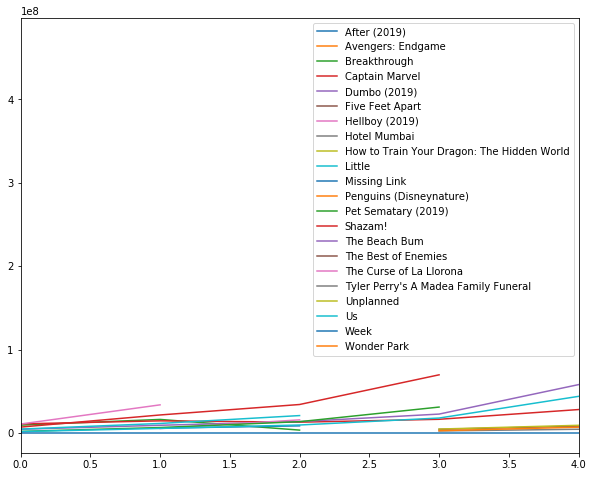

In [103]:
pd.DataFrame(grosses).plot(figsize = (10, 8))

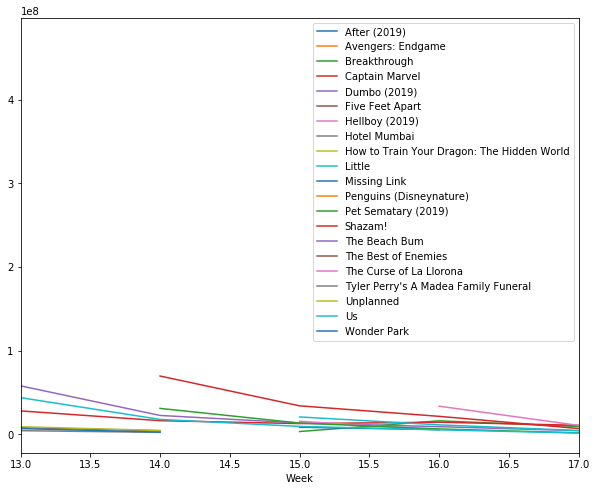

In [109]:
pd.DataFrame(grosses).set_index("Week").plot(figsize = (10, 8))

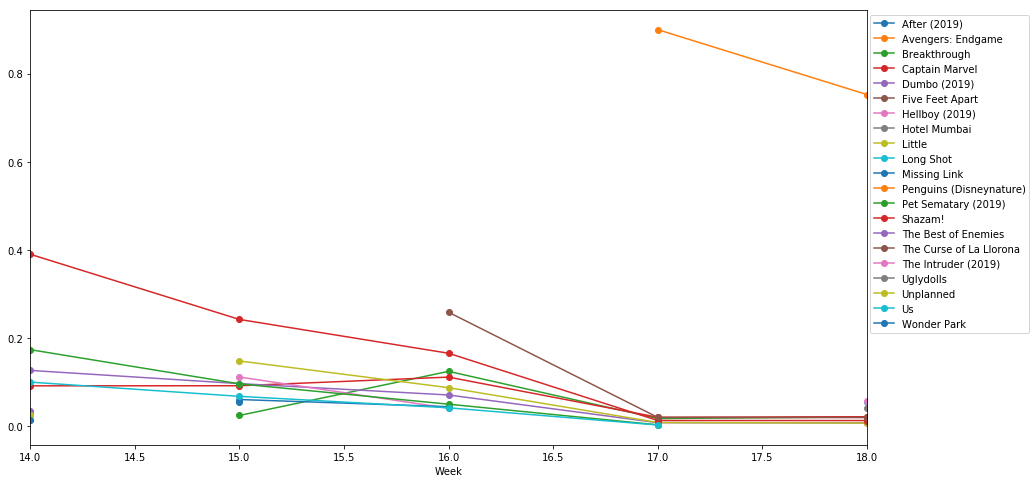

In [134]:
dfGrosses = pd.DataFrame(grosses).set_index("Week")
dfGrosses.div(dfGrosses.sum(axis=1), axis=0).plot(figsize = (15, 8),style='o-').legend(bbox_to_anchor=(1.2, 1))

In [73]:
for key, value in sorted(gross_movie.items(), key=lambda kv: -kv[1]):
    print(key, ",", value)


Avengers: Endgame , 473894638.0
Shazam! , 132743790.0
Dumbo (2019) , 108276592.0
Captain Marvel , 83186203.0
Us , 78810250.0
Pet Sematary (2019) , 53257219.0
The Curse of La Llorona , 44600003.0
Little , 37110325.0
Breakthrough , 29276512.0
Hellboy (2019) , 21178833.0
Missing Link , 14455055.0
Unplanned , 14030305.0
Five Feet Apart , 12735793.0
Wonder Park , 9780781.0
After (2019) , 7935149.0
Hotel Mumbai , 7045729.0
The Best of Enemies , 6101570.0
How to Train Your Dragon: The Hidden World , 5973235.0
Tyler Perry's A Madea Family Funeral , 3609631.0
The Beach Bum , 2518330.0
Penguins (Disneynature) , 1710403.0


In [19]:
gross_numeric = pd.to_numeric(df.head(10)["Weekly Gross"].str.replace(",", "").str.replace("$", ""))
gross_numeric/gross_numeric.sum()

1     0.899518
2     0.020809
3     0.020530
4     0.017968
5     0.013503
6     0.008923
7     0.008561
8     0.003672
9     0.003269
10    0.003247
Name: Weekly Gross, dtype: float64

In [44]:
from datetime import datetime

datetime.combine(np.min(get_week_days(current_week)), datetime.min.time())

datetime.datetime(2019, 4, 26, 0, 0)

## Organização dos dados em tabela

In [ ]:
table = res.find_all("td")
df = pd.read_html(str(table))[0][1:]
#df.columns = ["Rank", "Title", "Studio", "Worldwide", "Domestic", "% Domestic", "Overseas", "% Overseas"]
df.columns = ["This Week Rank","Last Week Rank", "Title", "Studio", "Weekly Gross", "% Gross Change", "Theater Count", "Theater Change", "Average", "Total Gross", "Budget", "Week #"]
df["Title"][1] = "Avengers OR Endgame"
df["Title"][4] = "Breakthrough movie"
df["Title"][6] = "Little movie"
df["Title"][7] = "Dumbo"
df["Title"][8] = "Pet sematary"
df["Title"][9] = "Us movie"
df["Title"][10] = "Penguins movie"
df.set_index ("This Week Rank").head(15)

## Query para a busca de tweets

In [9]:
query = "(" + ") OR (".join(df.head(10)["Title"]) + ")"
query

'(Avengers: Endgame) OR (Captain Marvel) OR (The Curse of La Llorona) OR (Breakthrough movie) OR (Shazam!) OR (Little movie) OR (Dumbo (2019)) OR (Pet Sematary (2019)) OR (Us movie) OR (Penguins movie)'

## Coleta dos tweets dada a query e os dias da respectiva semana

In [31]:
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import socket
import json
from dateutil.parser import *
from pymongo import MongoClient
class Twitter:
    
    def __init__ (self, current_week, week_days, query):
        token = {}

        token["access_token"] = '106758739-6x4oG4p3miv7q03l5RPuAXFzAGCf4PFB8cKOVKmR'
        token["access_secret"] = '8KZ7TntRCspc7if03auDaCK66XZVvIDoaEpbxAIXD4epJ'
        token["consumer_key"] = 'WRyfaTVVf9YXnNFSmtCNw8Cjl'
        token["consumer_secret"] = 'gpzhKJCXZky0e236LXqRyNFdcWsyRPoyIjQGKJwn2T7wtDIJ6g'

        option = "app"
        nRequests = 10000000
        #query = '(Captain Marvel) OR (The Wandering Earth) OR (How to Train Your Dragon: The Hidden World) OR (Alita: Battle Angel) OR (Glass) OR (The LEGO Movie 2: The Second Part) OR (Us) OR (Escape Room) OR (The Upside) OR (Extreme Job)'

        if option.lower() == "user" or option.lower() == "streaming":
            auth = OAuthHandler(token["consumer_key"], token["consumer_secret"])
            auth.set_access_token(token["access_token"], token["access_secret"])
        elif option.lower() == "app":
            auth = tweepy.AppAuthHandler(token["consumer_key"], token["consumer_secret"])

        api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

        def toJson(t):
            t = t._json
            t["created_at"] = parse(t["created_at"])
            if t["created_at"].date() <= week_days.max() and t["created_at"].date() >= week_days.min():
                t["week_number"] = current_week
                try:
                    db.insert_one(t)
                except:
                    pass
            elif t["created_at"].date() < week_days.min():
                self.stop = True                

        import time 
        import datetime

        db = MongoClient().mackenzie.movie_tweets
        
        i = 0
        self.stop = False

        for tweet in tweepy.Cursor(api.search, q=query + " -filter:retweets", count=100, 
                                                 include_entities=True, lang="en", tweet_mode="extended").pages(nRequests):
            print("\rPage %d" % i, end="")
            [toJson(t) for t in list(tweet)]
            if (self.stop):
                break
            i += 1

In [ ]:
Twitter(current_week, week_days, query)

Page 449

Rate limit reached. Sleeping for: 475


Page 899

Rate limit reached. Sleeping for: 480


Page 1189

## Visualização dos tweets

In [7]:
from pymongo import MongoClient

col = MongoClient().mackenzie.movie_tweets
tweets = list(col.find())
tweetsDF = pd.DataFrame(tweets)
tweetsDF.head(15)

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,truncated,user,week_number,withheld_in_countries
0,5ca161d59dc6d60d28a33baf,None,None,2019-04-01 00:56:26,"[65, 329]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,@Vokul1 @__ShtaKuro__ @peachgass @strangeautho...,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,"{'id': 249458827, 'id_str': '249458827', 'name...",13,NaN
1,5ca161d59dc6d60d28a33bb0,None,None,2019-04-01 00:56:24,"[0, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,This is the stupidest article I've ever read. ...,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 1058176970951933952, 'id_str': '1058176...",13,NaN
2,5ca161d59dc6d60d28a33bb1,None,None,2019-04-01 00:56:22,"[0, 49]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,"I saw Captain Marvel. Very nice, well researched.",...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 335716280, 'id_str': '335716280', 'name...",13,NaN
3,5ca161d59dc6d60d28a33bb2,None,None,2019-04-01 00:56:18,"[0, 163]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,UM Has anyone pointed out that Captain Marvel ...,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 1740680826, 'id_str': '1740680826', 'na...",13,NaN
4,5ca161d59dc6d60d28a33bb3,None,None,2019-04-01 00:56:08,"[0, 70]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,Just finished watching Captain Marvel. Must sa...,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 854817727, 'id_str': '854817727', 'name...",13,NaN
5,5ca161d59dc6d60d28a33bb4,None,None,2019-04-01 00:56:06,"[0, 115]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,3,False,We recommend a dozen movies to watch after you...,...,NaN,NaN,NaN,0,False,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",False,"{'id': 2172922045, 'id_str': '2172922045', 'na...",13,NaN
6,5ca161d59dc6d60d28a33bb5,None,None,2019-04-01 00:55:59,"[0, 33]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,100000% recommend five feet apart,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 1028087039391162368, 'id_str': '1028087...",13,NaN
7,5ca161d59dc6d60d28a33bb6,None,None,2019-04-01 00:55:51,"[0, 30]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,this is goose\n(captain marvel) https://t.co/B...,...,{'created_at': 'Sat Mar 30 21:26:25 +0000 2019...,1.112104e+18,1112103813819875329,0,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 3142249665, 'id_str': '3142249665', 'na...",13,NaN
8,5ca161d59dc6d60d28a33bb7,None,None,2019-04-01 00:55:42,"[79, 146]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,@Masshuuil @kaniehtiio @LesleyHampton @Ghost_B...,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 34575138, 'id_str': '34575138', 'name':...",13,NaN
9,5ca161d59dc6d60d28a33bb8,None,None,2019-04-01 00:55:41,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,Robert Rodriguez: Alita: Battle Angel Part 2 -...,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/android"" ...",False,"{'id': 34072511, 'id_str': '34072511', 'name':...",13,NaN


## Função de pré processamento de Texto

In [8]:
import nltk
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
import re
    
def cleanText(x):
    x = x.lower()
    x =  re.sub(r'@[A-Za-z0-9]+','',x)
    x = re.sub('https?://[A-Za-z0-9./]+','',x)
    x = re.sub("[^a-zA-Z]", " ", x)
    x = re.sub( '\s+', ' ', x).strip()
    return [word for word in x.split() if word not in (stopwords_set)]

## Verificar a existência do filme no tweet

In [ ]:
moviesDF = tweetsDF[["id", "full_text", "created_at"]]
for value in df["Title"].values[:10]:
    moviesDF[value] = moviesDF["full_text"].apply(lambda x: 1 if all(word in cleanText(x) for word in cleanText(value)) else 0)
moviesDF.head(15)

/home/guiraiol/anaconda3/envs/idp/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Contagem dos tweets por filme

In [ ]:
for value in df["Title"].values[:10]:
    print(value, moviesDF[value].sum())

## Gerar Tidy Data para cada observação, filtrando os tweets que não têm o filme e organizando para que cada linha seja um tweet que contém um filme

In [ ]:
tidyMovies = pd.melt(moviesDF, id_vars=['id', 'full_text', 'created_at'])
tidyMovies = tidyMovies[tidyMovies.value != 0].rename(columns = {"variable" : "movie", "value" : "present"})
tidyMovies.head(15)